### Loading required libraries

In [18]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

### Data Loading and Visualization

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.shape

(300, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


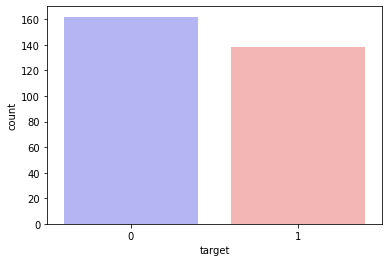

In [5]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

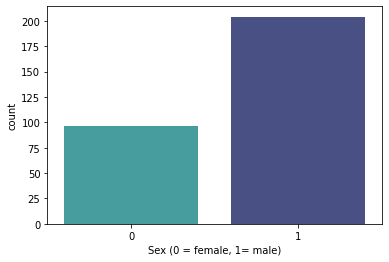

In [6]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

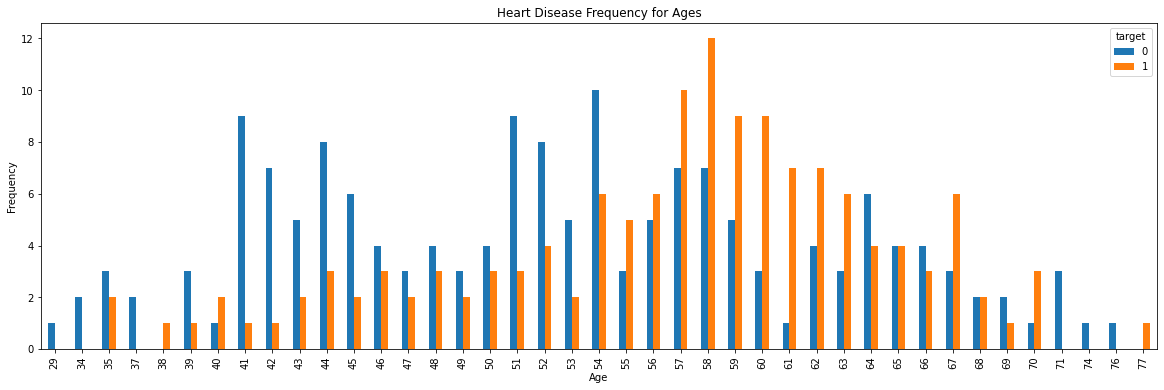

In [7]:
pd.crosstab(df.age, df.target).plot(kind="bar", figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

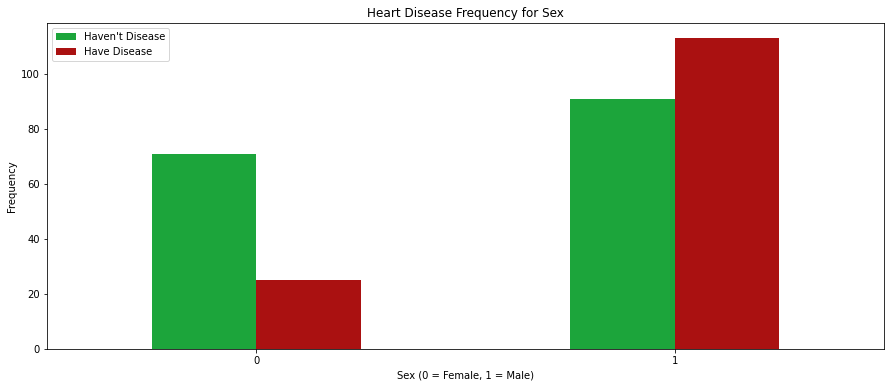

In [8]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

### Preprocessing

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [11]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'


c:\python\python3.7.4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\python\python3.7.4\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\python\python3.7.4\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__ma

In [12]:
df.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,typical angina,145,233,greater than 120mg/ml,left ventricular hypertrophy,150,no,2.3,downsloping,0,6,0
1,67,male,asymptomatic,160,286,lower than 120mg/ml,left ventricular hypertrophy,108,yes,1.5,flat,3,reversable defect,1
2,67,male,asymptomatic,120,229,lower than 120mg/ml,left ventricular hypertrophy,129,yes,2.6,flat,2,7,1
3,37,male,non-anginal pain,130,250,lower than 120mg/ml,normal,187,no,3.5,downsloping,0,reversable defect,0
4,41,female,atypical angina,130,204,lower than 120mg/ml,left ventricular hypertrophy,172,no,1.4,upsloping,0,reversable defect,0
5,56,male,atypical angina,120,236,lower than 120mg/ml,normal,178,no,0.8,upsloping,0,reversable defect,0
6,62,female,asymptomatic,140,268,lower than 120mg/ml,left ventricular hypertrophy,160,no,3.6,downsloping,2,reversable defect,1
7,57,female,asymptomatic,120,354,lower than 120mg/ml,normal,163,yes,0.6,upsloping,0,reversable defect,0
8,63,male,asymptomatic,130,254,lower than 120mg/ml,left ventricular hypertrophy,147,no,1.4,flat,1,7,1
9,53,male,asymptomatic,140,203,greater than 120mg/ml,left ventricular hypertrophy,155,yes,3.1,downsloping,0,7,1


In [13]:
df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['rest_ecg'] = df['rest_ecg'].astype('object')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
df['st_slope'] = df['st_slope'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')

In [14]:
df = pd.get_dummies(df, drop_first=True)

In [15]:
df.head(5)

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_7,thalassemia_reversable defect
0,63,145,233,150,2.3,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,67,160,286,108,1.5,3,1,1,0,0,0,1,1,0,1,1,0,0,1
2,67,120,229,129,2.6,2,1,1,0,0,0,1,1,0,1,1,0,1,0
3,37,130,250,187,3.5,0,0,1,0,1,0,1,0,1,0,0,0,0,1
4,41,130,204,172,1.4,0,0,0,1,0,0,1,1,0,0,0,1,0,1


### Model training

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 1), df['target'], test_size = 0.3, random_state = 27)

In [17]:
accuracies = {}

### Decision Tree Classifier

In [19]:
t = DecisionTreeClassifier(criterion = "gini",random_state = 100)
t.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [22]:
y_pred = t.predict(X_test)

In [23]:
accuracies['Decision Tree Classifier'] = t.score(X_test, y_test)*100

In [24]:
confusion_matrix(y_test, y_pred)

array([[39,  9],
       [11, 31]], dtype=int64)

##### RandomForestClassifier

In [25]:
m = RandomForestClassifier(n_estimators=100, max_depth=5)
m.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [26]:
y_pred = m.predict(X_test)

In [27]:
accuracies['Random Forest Classifier'] = m.score(X_test, y_test)*100

In [28]:
confusion_matrix(y_test, y_pred)

array([[40,  8],
       [11, 31]], dtype=int64)

##### LogisticRegression

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\python\python3.7.4\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [30]:
accuracies['Logistic Regression'] = lr.score(X_test, y_test)*100

In [31]:
y_pred = lr.predict(X_test)

In [32]:
confusion_matrix(y_test, y_pred)

array([[41,  7],
       [10, 32]], dtype=int64)

##### KNN Model

In [33]:
kn = KNeighborsClassifier(n_neighbors=2)
kn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [34]:
accuracies['KNN'] = kn.score(X_test, y_test)*100

In [35]:
y_pred = kn.predict(X_test)

In [36]:
confusion_matrix(y_test, y_pred)

array([[36, 12],
       [26, 16]], dtype=int64)

##### Naive Bayes

In [37]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [38]:
accuracies['Naive Bayes'] = nb.score(X_test, y_test)*100

In [39]:
y_pred = nb.predict(X_test)

In [40]:
confusion_matrix(y_test, y_pred)

array([[38, 10],
       [ 5, 37]], dtype=int64)

### Comparison of different models

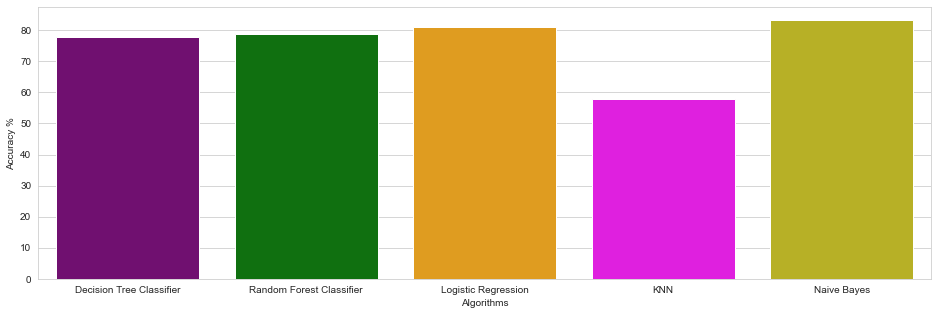

In [41]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

#### CONFUSION MATRIX

In [46]:
y_dt = t.predict(X_test)
y_rfc = m.predict(X_test)
y_lr = lr.predict(X_test)
y_knn = kn.predict(X_test)
y_nb = nb.predict(X_test)

In [47]:
cm_dt = confusion_matrix(y_test, y_dt)
cm_rfc = confusion_matrix(y_test, y_rfc)
cm_lr = confusion_matrix(y_test, y_lr)
cm_knn = confusion_matrix(y_test, y_knn)
cm_nb = confusion_matrix(y_test, y_nb)

<AxesSubplot:title={'center':'Random Forest Confusion Matrix'}>

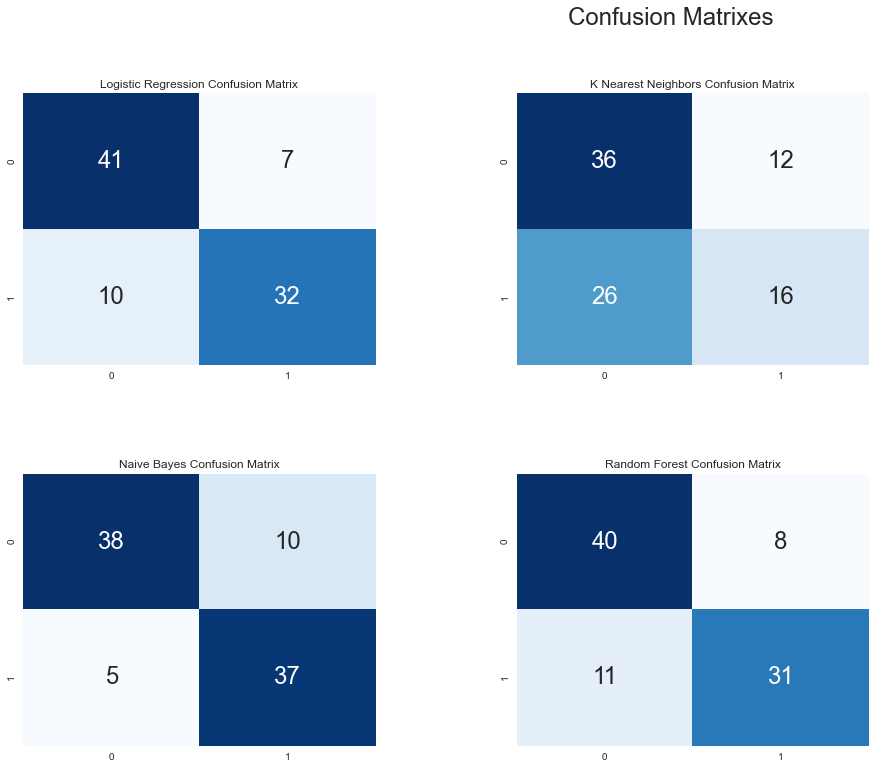

In [49]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rfc, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

<AxesSubplot:title={'center':'Decision Tree Confusion Matrix'}>

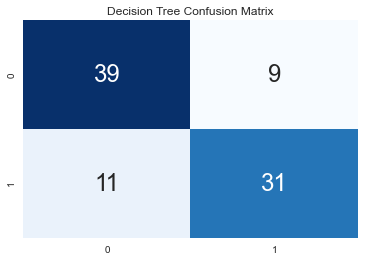

In [51]:
plt.plot(2,3,1)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_dt, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 24})

In [52]:
accuracies

{'Decision Tree Classifier': 77.77777777777779,
 'Random Forest Classifier': 78.88888888888889,
 'Logistic Regression': 81.11111111111111,
 'KNN': 57.77777777777777,
 'Naive Bayes': 83.33333333333334}